In [1]:
import os
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

# 작업 디렉토리 변경
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

Mounted at /content/drive


In [4]:
TASK_CODE = "250318-AI-001"

In [36]:
import numpy as np
import json
import pandas as pd

def convert_json_to_csv(json_file_path, output_csv_path):

    # JSON 파일 로드
    with open(json_file_path, "r", encoding="utf-8") as file:
        data = json.load(file)

    # DataFrame 변환
    df = pd.DataFrame(data)

    # 상담 텍스트(HS01, HS02, HS03만 합침) 추출
    df["text"] = df["talk"].apply(lambda x: " ".join([x["content"].get(k, "") for k in ["HS01", "HS02", "HS03"]]).strip())
    df["emotion"] = df["profile"].apply(lambda x: x["emotion"]["type"])
    df["situation"] = df["profile"].apply(lambda x: x["emotion"]["situation"][0])

    # 필요 없는 컬럼 제거
    df = df[["text", "emotion", 'situation']]

    # CSV 저장
    df.to_csv(output_csv_path, index=False, encoding="utf-8-sig")
    print(f"✅ 변환 완료: {output_csv_path}")


# 🔹 두 개의 JSON 파일 변환 실행
convert_json_to_csv("data/감성대화말뭉치(최종데이터)_Training.json", f"data/{TASK_CODE}_train_dataset.csv")
convert_json_to_csv("data/감성대화말뭉치(최종데이터)_Validation.json", f"data/{TASK_CODE}_test_dataset.csv")


✅ 변환 완료: data/250318-AI-001_train_dataset.csv
✅ 변환 완료: data/250318-AI-001_test_dataset.csv


In [37]:
train_df = pd.read_csv(f'data/{TASK_CODE}_train_dataset.csv', encoding='utf-8-sig')
test_df = pd.read_csv(f'data/{TASK_CODE}_test_dataset.csv', encoding='utf-8-sig')

In [40]:
print(train_df.head())
print(test_df.head())

                                                text emotion situation
0  일은 왜 해도 해도 끝이 없을까? 화가 난다. 그냥 내가 해결하는 게 나아. 남들한...     E18       S06
1  이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나....     E18       S06
2  회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...     E18       S06
3  직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...     E18       S06
4  얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나. 상사인 나에게 ...     E18       S06
                                                text emotion situation
0  이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...     E31       S06
1  회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워. 나에게 너무 크...     E31       S06
2  상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워. 무섭게 생겼는데도 업무를 보려...     E31       S06
3  이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다. 첫 직장...     E31       S06
4  직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼. 내가 낯가림이 심해서 친해질 수...     E31       S06


In [42]:
print(np.unique(train_df['emotion']))
print(np.unique(train_df['situation']))

['E10' 'E11' 'E12' 'E13' 'E14' 'E15' 'E16' 'E17' 'E18' 'E19' 'E20' 'E21'
 'E22' 'E23' 'E24' 'E25' 'E26' 'E27' 'E28' 'E29' 'E30' 'E31' 'E32' 'E33'
 'E34' 'E35' 'E36' 'E37' 'E38' 'E39' 'E40' 'E41' 'E42' 'E43' 'E44' 'E45'
 'E46' 'E47' 'E48' 'E49' 'E50' 'E51' 'E52' 'E53' 'E54' 'E55' 'E56' 'E57'
 'E58' 'E59' 'E60' 'E61' 'E62' 'E63' 'E64' 'E65' 'E66' 'E67' 'E68' 'E69']
['S01' 'S02' 'S03' 'S04' 'S05' 'S06' 'S07' 'S08' 'S09' 'S10' 'S11' 'S13']


In [44]:
from sklearn.preprocessing import LabelEncoder

# 감정(6개) 한글로 변환
emotion_mapping = {
    "분노": ['E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19'],
    "슬픔": ['E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29'],
    "불안": ['E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39'],
    "상처": ['E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49'],
    "당황": ['E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58', 'E59'],
    "기쁨": ['E60', 'E61', 'E62', 'E63', 'E64', 'E65', 'E66', 'E67', 'E68', 'E69']
}

# 감정 매핑 함수
def map_emotion(emotion_id):
    for group, ids in emotion_mapping.items():
        if emotion_id in ids:
            return group
    return "기타"

# 감정 변환 적용
train_df["emotion"] = train_df["emotion"].apply(map_emotion)
test_df["emotion"] = test_df["emotion"].apply(map_emotion)


# 상황 매핑 (ID → 한글)
situation_mapping = {
    "S01": "가족관계",
    "S02": "학업 및 진로",
    "S03": "학교폭력/따돌림",
    "S04": "대인관계",
    "S05": "연애, 결혼, 출산",
    "S06": "진로, 취업, 직장",
    "S07": "대인관계(부부, 자녀)",
    "S08": "재정, 은퇴, 노후준비",
    "S09": "건강",
    "S10": "직장, 업무 스트레스",
    "S11": "건강, 죽음",
    "S13": "재정"
}

train_df["situation"] = train_df["situation"].map(situation_mapping)
test_df["situation"] = test_df["situation"].map(situation_mapping)

# ✅ 레이블 인코딩 적용
emotion_encoder = LabelEncoder()
situation_encoder = LabelEncoder()

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
emotion_encoder = LabelEncoder()
situation_encoder = LabelEncoder()

# ✅ 학습 데이터 (train_df)에서 Label Encoding 학습
train_df["emotion_encoded"] = emotion_encoder.fit_transform(train_df["emotion"])
train_df["situation_encoded"] = situation_encoder.fit_transform(train_df["situation"])

# ✅ 테스트 데이터 (test_df)에도 동일한 인코딩 적용
test_df["emotion_encoded"] = emotion_encoder.transform(test_df["emotion"])
test_df["situation_encoded"] = situation_encoder.transform(test_df["situation"])





In [46]:
print(train_df.head(5))
print(test_df.head(5))

                                                text emotion   situation  \
0  일은 왜 해도 해도 끝이 없을까? 화가 난다. 그냥 내가 해결하는 게 나아. 남들한...      분노  진로, 취업, 직장   
1  이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나....      분노  진로, 취업, 직장   
2  회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...      분노  진로, 취업, 직장   
3  직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...      분노  진로, 취업, 직장   
4  얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나. 상사인 나에게 ...      분노  진로, 취업, 직장   

   emotion_encoded  situation_encoded  
0                2                  9  
1                2                  9  
2                2                  9  
3                2                  9  
4                2                  9  
                                                text emotion   situation  \
0  이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...      불안  진로, 취업, 직장   
1  회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워. 나에게 너무 크...      불안  진로, 취업, 직장   
2  상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워. 무섭게 생겼는데도 업무를 보려...      불안  진로, 취업, 직장   

In [48]:
import re

def preprocess_text(text):
    # 감정 분석에 중요한 특수문자 유지
    important_chars = "!?,~ㅠㅋ^…"
    text = ''.join([char if char in important_chars or char.isalnum() else ' ' for char in text])

    # 연속된 특수문자 축약 (!!!!! → !, ㅋㅋㅋ → ㅋㅋ)
    text = re.sub(r'([!?.])\1+', r'\1', text)
    text = re.sub(r'(ㅋ)\1+', r'\1\1', text)  # ㅋㅋㅋㅋㅋ → ㅋㅋ
    text = re.sub(r'(ㅠ)\1+', r'\1\1', text)  # ㅠㅠㅠㅠ → ㅠㅠ

    return text.strip()


train_df["text"] = train_df["text"].apply(preprocess_text)
test_df["text"] = test_df["text"].apply(preprocess_text)

In [50]:
train_df = train_df[['text', 'emotion_encoded', 'situation_encoded']]
test_df = test_df[['text', 'emotion_encoded', 'situation_encoded']]

In [52]:
print(train_df.head(5))
print(test_df.head(5))

                                                text  emotion_encoded  \
0  일은 왜 해도 해도 끝이 없을까? 화가 난다  그냥 내가 해결하는 게 나아  남들한...                2   
1  이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나 ...                2   
2  회사에 신입이 들어왔는데 말투가 거슬려  그런 애를 매일 봐야 한다고 생각하니까 스...                2   
3  직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜  일도 많은 데 정말 분하고 ...                2   
4  얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나  상사인 나에게 ...                2   

   situation_encoded  
0                  9  
1                  9  
2                  9  
3                  9  
4                  9  
                                                text  emotion_encoded  \
0  이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어  너...                3   
1  회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워  나에게 너무 크...                3   
2  상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워  무섭게 생겼는데도 업무를 보려...                3   
3  이번에 힘들게 들어간 첫 직장이거든  첫 직장이라서 그런지 너무 긴장된다  첫 직장...                3   
4  직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼  내가 낯가림이 심해서 친해질 수...      

In [54]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51628 entries, 0 to 51627
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               51628 non-null  object
 1   emotion_encoded    51628 non-null  int32 
 2   situation_encoded  51628 non-null  int32 
dtypes: int32(2), object(1)
memory usage: 806.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6640 entries, 0 to 6639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               6640 non-null   object
 1   emotion_encoded    6640 non-null   int32 
 2   situation_encoded  6640 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 103.9+ KB
None


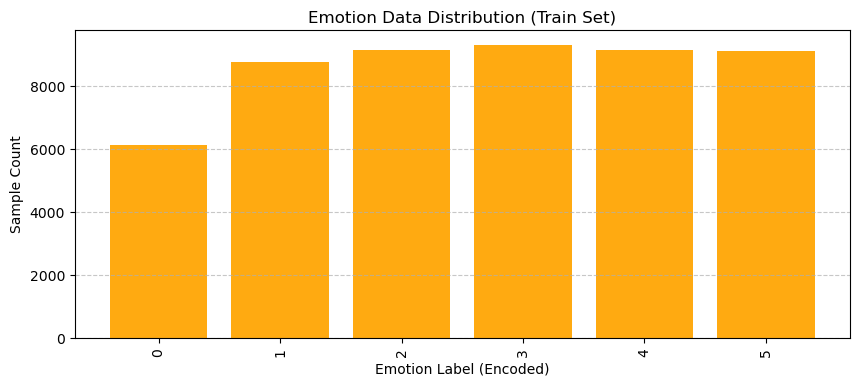

In [56]:
import matplotlib.pyplot as plt

# 감정 데이터 개수 확인
emotion_counts = train_df["emotion_encoded"].value_counts().sort_index()

# 감정 데이터 분포 시각화 (plt 사용)
plt.figure(figsize=(10, 4))
plt.bar(emotion_counts.index, emotion_counts.values, color='#fa1')
plt.xlabel("Emotion Label (Encoded)")
plt.ylabel("Sample Count")
plt.title("Emotion Data Distribution (Train Set)")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 가독성을 위한 그리드 추가
plt.show()


In [58]:
# 전처리된 데이터 저장
train_df.to_csv(f"data/{TASK_CODE}_train_df.csv", index=False, encoding="utf-8-sig")
test_df.to_csv(f"data/{TASK_CODE}_test_df.csv", index=False, encoding="utf-8-sig")
print("전처리 데이터 저장 완료!")

전처리 데이터 저장 완료!


In [18]:
# pip install transformers torch

In [60]:
import torch
import torch.nn as nn
from transformers import ElectraModel

class KoELECTRAEmotionSituation(nn.Module):
    def __init__(self, model_name, num_emotions=6, num_situations=12, dropout_prob=0.1):
        super(KoELECTRAEmotionSituation, self).__init__()

        # KoELECTRA 모델 로드
        self.electra = ElectraModel.from_pretrained(model_name)

        # Dropout 및 Fully Connected Layer
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(768, 256)
        self.relu = nn.ReLU()

        # 감정 분류 (6개)
        self.emotion_classifier = nn.Linear(256, num_emotions)

        # 상황 분류 (12개)
        self.situation_classifier = nn.Linear(256, num_situations)

    def forward(self, input_ids, attention_mask, token_type_ids):
        # KoELECTRA Forward
        outputs = self.electra(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

        # CLS 토큰 출력 (768차원)
        cls_output = outputs.last_hidden_state[:, 0, :]

        # 공통 레이어
        x = self.fc(cls_output)
        x = self.relu(x)
        x = self.dropout(x)

        # 감정 및 상황 예측
        emotion_logits = self.emotion_classifier(x)  # 감정 분류 (6개)
        situation_logits = self.situation_classifier(x)  # 상황 분류 (13개)

        return emotion_logits, situation_logits


In [62]:
import pandas as pd
train_df = pd.read_csv(f"data/{TASK_CODE}_train_df.csv", encoding="utf-8-sig")
test_df = pd.read_csv(f"data/{TASK_CODE}_test_df.csv",  encoding="utf-8-sig")

print("✅ 데이터 로드 완료!")
print(train_df.head())  # 데이터 샘플 확인

✅ 데이터 로드 완료!
                                                text  emotion_encoded  \
0  일은 왜 해도 해도 끝이 없을까? 화가 난다  그냥 내가 해결하는 게 나아  남들한...                2   
1  이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나 ...                2   
2  회사에 신입이 들어왔는데 말투가 거슬려  그런 애를 매일 봐야 한다고 생각하니까 스...                2   
3  직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜  일도 많은 데 정말 분하고 ...                2   
4  얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나  상사인 나에게 ...                2   

   situation_encoded  
0                  9  
1                  9  
2                  9  
3                  9  
4                  9  


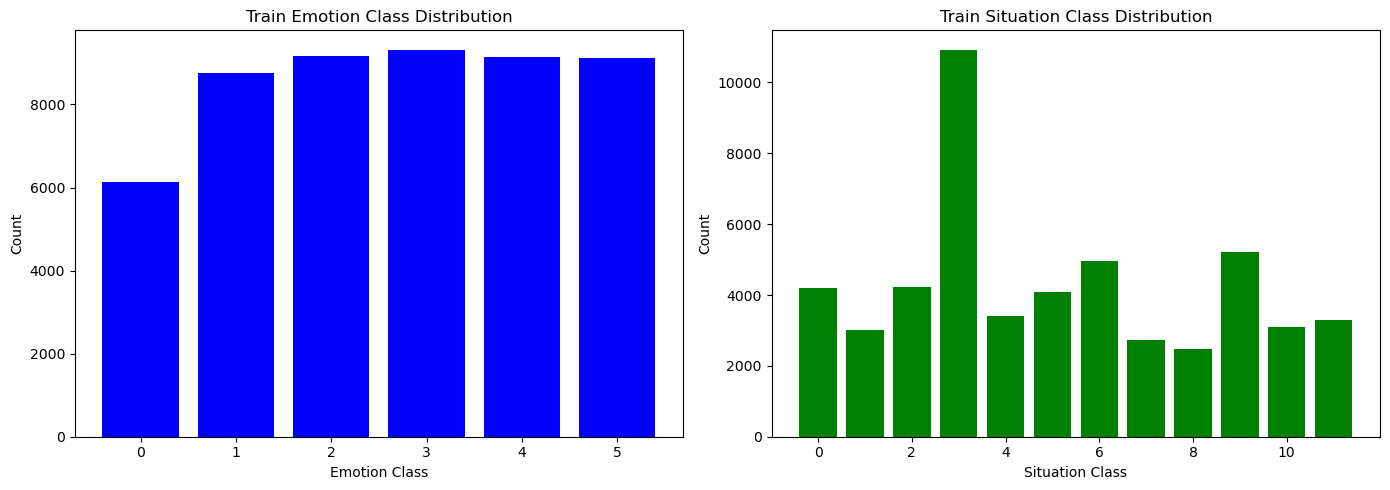

In [64]:
import matplotlib.pyplot as plt

def plot_train_class_distribution(train_df, emotion_col="emotion_encoded", situation_col="situation_encoded"):
    """
    감정(Emotion) 및 상황(Situation) 데이터 분포를 시각화하는 함수 (1행 2열 형태)

    :param train_df: 훈련 데이터프레임
    :param emotion_col: 감정 레이블 컬럼명 (기본값: "emotion_encoded")
    :param situation_col: 상황 레이블 컬럼명 (기본값: "situation_encoded")
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # 감정 데이터 분포 (Train)
    train_emotion_counts = train_df[emotion_col].value_counts().sort_index()
    axes[0].bar(train_emotion_counts.index, train_emotion_counts.values, color="blue")
    axes[0].set_title("Train Emotion Class Distribution")
    axes[0].set_xlabel("Emotion Class")
    axes[0].set_ylabel("Count")

    # 상황 데이터 분포 (Train)
    train_situation_counts = train_df[situation_col].value_counts().sort_index()
    axes[1].bar(train_situation_counts.index, train_situation_counts.values, color="green")
    axes[1].set_title("Train Situation Class Distribution")
    axes[1].set_xlabel("Situation Class")
    axes[1].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

# 시각화 함수 실행
plot_train_class_distribution(train_df)


In [63]:
!pip install koeda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.4/566.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 36.7 MB/s eta 0:00:00
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.15.0
    Uninstalling tweepy-4.15.0:
      Successfully uninstalled tweepy-4.15.0


In [66]:
print(train_df["situation_encoded"].value_counts())
print(train_df["emotion_encoded"].value_counts())

situation_encoded
3     10926
9      5223
6      4962
2      4222
0      4207
5      4085
4      3402
11     3283
10     3091
1      3022
7      2738
8      2467
Name: count, dtype: int64
emotion_encoded
3    9319
2    9160
4    9142
5    9125
1    8756
0    6126
Name: count, dtype: int64


In [59]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# ✅ 감정 + 상황을 결합하여 새로운 라벨 생성
train_df["combined_label"] = train_df["emotion_encoded"].astype(str) + "_" + train_df["situation_encoded"].astype(str)

# ✅ X (텍스트), y (결합된 라벨)
X = train_df["text"]
y = train_df["combined_label"]

# ✅ RandomOverSampler 오버샘플링 적용
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X.values.reshape(-1, 1), y)

# ✅ 오버샘플링된 데이터프레임 생성
train_df_resampled = pd.DataFrame({'text': X_resampled.flatten(), 'combined_label': y_resampled})

# ✅ 감정과 상황 다시 분리
train_df_resampled[['emotion_encoded', 'situation_encoded']] = train_df_resampled['combined_label'].str.split('_', expand=True)
train_df_resampled = train_df_resampled.drop(columns=['combined_label'])

# ✅ 감정과 상황을 정수형으로 변환
train_df_resampled['emotion_encoded'] = train_df_resampled['emotion_encoded'].astype(int)
train_df_resampled['situation_encoded'] = train_df_resampled['situation_encoded'].astype(int)

# ✅ 오버샘플링 후 감정 & 상황 분포 확인
print("\n📊 오버샘플링 후 감정 클래스 분포:\n", Counter(train_df_resampled['emotion_encoded']))
print("\n📊 오버샘플링 후 상황 클래스 분포:\n", Counter(train_df_resampled['situation_encoded']))



📊 오버샘플링 후 감정 클래스 분포:
 Counter({2: 24480, 0: 24480, 3: 24480, 1: 24480, 5: 24480, 4: 24480})

📊 오버샘플링 후 상황 클래스 분포:
 Counter({9: 12240, 3: 12240, 5: 12240, 7: 12240, 6: 12240, 2: 12240, 11: 12240, 10: 12240, 8: 12240, 4: 12240, 0: 12240, 1: 12240})


In [60]:
print(train_df_resampled["situation_encoded"].value_counts())
print(train_df_resampled["emotion_encoded"].value_counts())

situation_encoded
9     12240
3     12240
5     12240
7     12240
6     12240
2     12240
11    12240
10    12240
8     12240
4     12240
0     12240
1     12240
Name: count, dtype: int64
emotion_encoded
2    24480
0    24480
3    24480
1    24480
5    24480
4    24480
Name: count, dtype: int64


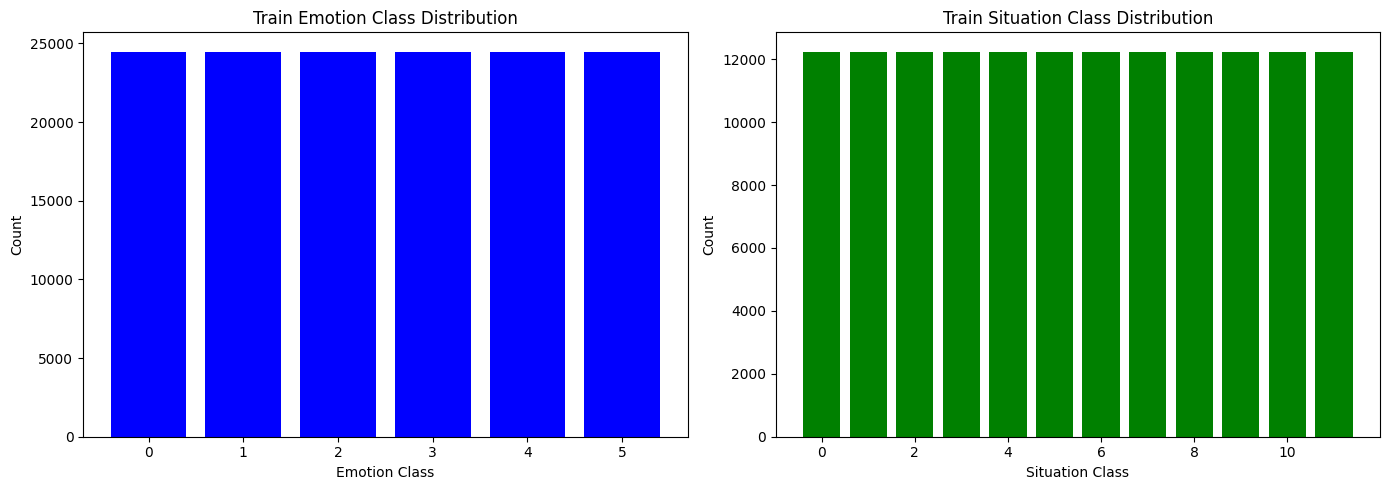

In [61]:
plot_train_class_distribution(train_df_resampled)

In [ ]:
train_df_resampled.head()

In [64]:
from tqdm.auto import tqdm
from koeda import EDA

# ✅ KoEDA 설정 (형태소 분석기 선택 가능: "Okt", "Mecab")
eda = EDA(
    morpheme_analyzer="Okt",
    alpha_sr=0.1,  # 동의어 교체 확률
    alpha_ri=0.1,  # 랜덤 삽입 확률
    alpha_rs=0.1   # 랜덤 순서 변경 확률
)

# ✅ tqdm 진행률 적용
tqdm.pandas(desc="Applying KoEDA Augmentation")

# ✅ KoEDA 증강 적용 (NaN 방지 포함)
train_df_resampled["text"] = train_df_resampled["text"].fillna("").astype(str).progress_apply(
    lambda x: eda(x) if x else x
)


Applying KoEDA Augmentation:   0%|          | 0/146880 [00:00<?, ?it/s]

In [65]:
train_df_resampled.head()

,text,emotion_encoded,situation_encoded
0,일은 한 왜 해도 해도 끝이 없을까? 화가 매듭 난다 그냥 내가 해결하는 게 나아 ...,2,9
1,이번 달에 년 또 급여가 반제 깎였어! 물가는 오르는데 월급 극도 만 자꾸 깎이니까...,2,9
2,에 신입이 들어왔는데 말투가 거슬려 그런 애를 매일 봐야 한다고 생각하니까 스트레스...,2,9
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜 일도 많은 데 정말 세공 분하...,2,9
4,얼마 전 입사한 신입사원이 나를 무시 것 같아서 너무 화가 나하는상사인 나에게 먼저...,2,9


In [66]:
train_df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146880 entries, 0 to 146879
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   text               146880 non-null  object
 1   emotion_encoded    146880 non-null  int64 
 2   situation_encoded  146880 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


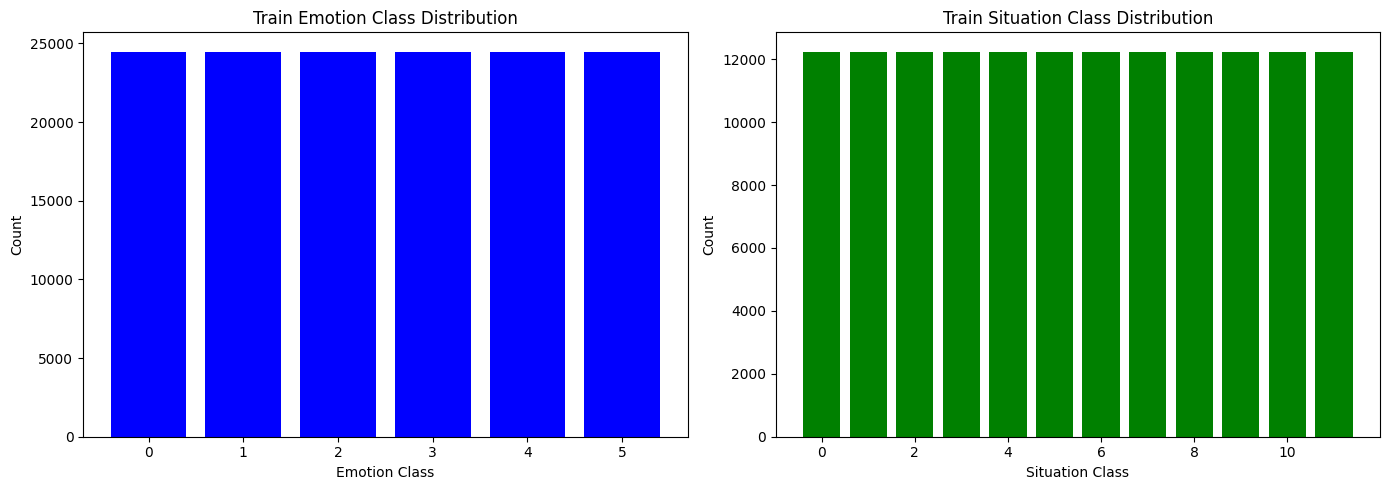

In [67]:
plot_train_class_distribution(train_df_resampled)

In [68]:
train_df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146880 entries, 0 to 146879
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   text               146880 non-null  object
 1   emotion_encoded    146880 non-null  int64 
 2   situation_encoded  146880 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [68]:
#train_df = train_df_resampled.copy()
train_df.to_csv(f"data/{TASK_CODE}_train_df_oversampling.csv", index=False, encoding="utf-8-sig")

In [ ]:
## 학습 시작

In [70]:
from transformers import ElectraTokenizer  # ✅ KoELECTRA로 변경
tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-discriminator")  # KoELECTRA 모델 적용
print("✅ KoELECTRA 토크나이저 로드 완료!")

✅ KoELECTRA 토크나이저 로드 완료!


In [72]:
import torch
from torch.utils.data import Dataset

# ✅ 감정 + 상황 분류 데이터셋 정의
class EmotionSituationDataset(Dataset):
    def __init__(self, texts, emotions, situations, tokenizer, max_length=128):
        self.texts = texts
        self.emotions = list(map(int, emotions))  # 🔹 감정(Label) 정수 변환
        self.situations = list(map(int, situations))  # 🔹 상황(Label) 정수 변환
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # 토큰화 수행
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt"
        )

        # Tensor 변환 및 반환
        input_ids = encoding["input_ids"].squeeze(0)
        attention_mask = encoding["attention_mask"].squeeze(0)
        token_type_ids = encoding["token_type_ids"].squeeze(0)

        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "token_type_ids": token_type_ids,
            "emotion": torch.tensor(self.emotions[idx], dtype=torch.long),  # ✅ 감정(Label)
            "situation": torch.tensor(self.situations[idx], dtype=torch.long),  # ✅ 상황(Label)
        }

print("✅ PyTorch Dataset (Emotion + Situation) 정의 완료!")


✅ PyTorch Dataset (Emotion + Situation) 정의 완료!


In [74]:
import pandas as pd

# ✅ 전처리된 감정 데이터 로드
train_df = pd.read_csv(f"data/{TASK_CODE}_train_df_oversampling.csv", encoding="utf-8-sig")
test_df = pd.read_csv(f"data/{TASK_CODE}_test_df.csv", encoding="utf-8-sig")

# ✅ Dataset 생성
train_dataset = EmotionSituationDataset(
    train_df["text"].tolist(),
    train_df["emotion_encoded"].tolist(),
    train_df["situation_encoded"].tolist(),
    tokenizer
)

test_dataset = EmotionSituationDataset(
    test_df["text"].tolist(),
    test_df["emotion_encoded"].tolist(),
    train_df["situation_encoded"].tolist(),
    tokenizer
)

print("✅ Dataset 생성 완료!")


✅ Dataset 생성 완료!


In [108]:
from torch.utils.data import DataLoader

# ✅ DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print("✅ DataLoader 생성 완료!")


✅ DataLoader 생성 완료!


In [78]:
import torch

# ✅ GPU 사용 가능하면 GPU로 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"✅ Using device: {device}")


✅ Using device: cuda


In [86]:
# ✅ KoBERT 감정 분류 모델 불러오기
num_emotions = len(train_df["emotion_encoded"].unique())
num_situations = len(train_df["situation_encoded"].unique())

print(num_emotions)
print(num_situations)


model_name = "monologg/koelectra-base-discriminator"  # ✅ KoELECTRA 적용
model = KoELECTRAEmotionSituation(model_name, num_emotions=num_emotions, num_situations=num_situations, dropout_prob=0.3).to(device)



6
12


In [110]:
from torch.optim import AdamW
import torch.nn as nn

# ✅ 손실 함수 (CrossEntropyLoss)
criterion_emotion = nn.CrossEntropyLoss()
criterion_situation = nn.CrossEntropyLoss()

# ✅ 옵티마이저 (AdamW)
optimizer = AdamW(model.parameters(), lr=1e-5, eps=1e-8, weight_decay=1e-2)

# ✅ 감정과 상황 손실 가중치 설정
alpha = 0.3
beta = 0.7

print("✅ 손실 함수 및 옵티마이저 설정 완료!")


✅ 손실 함수 및 옵티마이저 설정 완료!


In [112]:
import time
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score
import torch

# ✅ 학습 관련 변수 초기화
num_epochs = 30
best_loss = float("inf")
early_stopping_patience = 8
no_improve_count = 0

# ✅ 학습 기록 저장용
history = {
    "train_loss": [], "val_loss": [],
    "train_acc_emotion": [], "val_acc_emotion": [],
    "train_acc_situation": [], "val_acc_situation": []
}

# ✅ 학습 루프 시작
for epoch in range(num_epochs):
    start_time = time.time()
    print(f"\n🔥 Epoch {epoch + 1}/{num_epochs}")

    # 🔹 Training 단계
    model.train()
    train_loss, correct_emotions, correct_situations, total_samples = 0, 0, 0, 0

    train_iterator = tqdm(train_loader, desc=f"Training Epoch {epoch + 1}", dynamic_ncols=True)

    for batch in train_iterator:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        labels_emotion = batch["emotion"].to(device)
        labels_situation = batch["situation"].to(device)

        optimizer.zero_grad()

        # 모델 예측 (감정 & 상황)
        logits_emotion, logits_situation = model(input_ids, attention_mask, token_type_ids)

        # 손실 계산
        loss_emotion = criterion_emotion(logits_emotion, labels_emotion)
        loss_situation = criterion_situation(logits_situation, labels_situation)

        # ✅ 최종 손실 함수
        loss = alpha * loss_emotion + beta * loss_situation

        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        # ✅ 정확도 계산
        preds_emotion = torch.argmax(logits_emotion, dim=1)
        preds_situation = torch.argmax(logits_situation, dim=1)

        correct_emotions += torch.sum(preds_emotion == labels_emotion).item()
        correct_situations += torch.sum(preds_situation == labels_situation).item()
        total_samples += labels_emotion.size(0)

        # 🔹 tqdm 한 줄 갱신
        train_iterator.set_postfix({
            "Loss": f"{train_loss / (total_samples + 1e-8):.4f}",
            "Acc_Emo": f"{correct_emotions / (total_samples + 1e-8):.4f}",
            "Acc_Situ": f"{correct_situations / (total_samples + 1e-8):.4f}"
        })

    # 🔹 학습 손실 및 정확도 기록
    train_loss /= len(train_loader)
    train_acc_emotion = correct_emotions / total_samples
    train_acc_situation = correct_situations / total_samples
    history["train_loss"].append(train_loss)
    history["train_acc_emotion"].append(train_acc_emotion)
    history["train_acc_situation"].append(train_acc_situation)

    # 🔹 Validation 단계
    model.eval()
    val_loss, correct_emotions, correct_situations, total_samples = 0, 0, 0, 0

    val_iterator = tqdm(test_loader, desc=f"Validating Epoch {epoch + 1}", dynamic_ncols=True)

    with torch.no_grad():
        for batch in val_iterator:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            token_type_ids = batch["token_type_ids"].to(device)
            labels_emotion = batch["emotion"].to(device)
            labels_situation = batch["situation"].to(device)

            # 모델 예측
            logits_emotion, logits_situation = model(input_ids, attention_mask, token_type_ids)

            # 손실 계산
            loss_emotion = criterion_emotion(logits_emotion, labels_emotion)
            loss_situation = criterion_situation(logits_situation, labels_situation)

            # ✅ 최종 손실 함수
            loss = alpha * loss_emotion + beta * loss_situation

            val_loss += loss.item()

            # ✅ 정확도 계산
            preds_emotion = torch.argmax(logits_emotion, dim=1)
            preds_situation = torch.argmax(logits_situation, dim=1)

            correct_emotions += torch.sum(preds_emotion == labels_emotion).item()
            correct_situations += torch.sum(preds_situation == labels_situation).item()
            total_samples += labels_emotion.size(0)

            # 🔹 tqdm 한 줄 갱신
            val_iterator.set_postfix({
                "Loss": f"{val_loss / (total_samples + 1e-8):.4f}",
                "Acc_Emo": f"{correct_emotions / (total_samples + 1e-8):.4f}",
                "Acc_Situ": f"{correct_situations / (total_samples + 1e-8):.4f}"
            })

    # 🔹 검증 손실 및 정확도 기록
    val_loss /= len(test_loader)
    val_acc_emotion = correct_emotions / total_samples
    val_acc_situation = correct_situations / total_samples
    history["val_loss"].append(val_loss)
    history["val_acc_emotion"].append(val_acc_emotion)
    history["val_acc_situation"].append(val_acc_situation)

    elapsed_time = time.time() - start_time

    print(f"📉 Epoch {epoch + 1}/{num_epochs} - Loss: {val_loss:.4f} | Emo Acc: {val_acc_emotion:.4f} | Situ Acc: {val_acc_situation:.4f} | Time: {elapsed_time:.2f} sec")

    # 🔹 베스트 모델 저장
    if val_loss < best_loss:
        best_loss = val_loss
        no_improve_count = 0
        torch.save(model.state_dict(), f"checkpoints/{TASK_CODE}-best_model.pth")
        torch.save(history, f"checkpoints/{TASK_CODE}-history.pth")
        print("✅ Best model & history saved!")
    else:
        no_improve_count += 1

    # 🔹 Early Stopping 체크
    if no_improve_count >= early_stopping_patience:
        print("⏹️ Early Stopping Triggered! Training Stopped.")
        break

# 🔹 최종 모델 저장
torch.save(model.state_dict(), f"checkpoints/{TASK_CODE}-final_model.pth")
torch.save(history, f"checkpoints/{TASK_CODE}-final_history.pth")
print("🎉 Training completed! Final model & history saved.")



🔥 Epoch 1/30


Validating Epoch 1: 100%|██████████████| 830/830 [02:03<00:00,  6.74it/s, Loss=0.4041, Acc_Emo=0.3806, Acc_Situ=0.1078]


📉 Epoch 1/30 - Loss: 3.2332 | Emo Acc: 0.3806 | Situ Acc: 0.1078 | Time: 5316.84 sec
✅ Best model & history saved!

🔥 Epoch 2/30


Validating Epoch 2: 100%|██████████████| 830/830 [00:50<00:00, 16.59it/s, Loss=0.4295, Acc_Emo=0.5086, Acc_Situ=0.1051]


📉 Epoch 2/30 - Loss: 3.4363 | Emo Acc: 0.5086 | Situ Acc: 0.1051 | Time: 5676.73 sec

🔥 Epoch 3/30


Validating Epoch 3: 100%|██████████████| 830/830 [00:49<00:00, 16.67it/s, Loss=0.4453, Acc_Emo=0.6476, Acc_Situ=0.1044]


📉 Epoch 3/30 - Loss: 3.5626 | Emo Acc: 0.6476 | Situ Acc: 0.1044 | Time: 4379.40 sec

🔥 Epoch 4/30


Validating Epoch 4: 100%|██████████████| 830/830 [00:49<00:00, 16.69it/s, Loss=0.4765, Acc_Emo=0.6923, Acc_Situ=0.1131]


📉 Epoch 4/30 - Loss: 3.8119 | Emo Acc: 0.6923 | Situ Acc: 0.1131 | Time: 4378.60 sec

🔥 Epoch 5/30


Validating Epoch 5: 100%|██████████████| 830/830 [01:36<00:00,  8.61it/s, Loss=0.5082, Acc_Emo=0.7187, Acc_Situ=0.1120]


📉 Epoch 5/30 - Loss: 4.0659 | Emo Acc: 0.7187 | Situ Acc: 0.1120 | Time: 4454.13 sec

🔥 Epoch 6/30


Validating Epoch 6: 100%|██████████████| 830/830 [01:36<00:00,  8.59it/s, Loss=0.5326, Acc_Emo=0.7276, Acc_Situ=0.1069]


📉 Epoch 6/30 - Loss: 4.2608 | Emo Acc: 0.7276 | Situ Acc: 0.1069 | Time: 4467.61 sec

🔥 Epoch 7/30


Validating Epoch 7: 100%|██████████████| 830/830 [01:36<00:00,  8.63it/s, Loss=0.5493, Acc_Emo=0.7378, Acc_Situ=0.1110]


📉 Epoch 7/30 - Loss: 4.3947 | Emo Acc: 0.7378 | Situ Acc: 0.1110 | Time: 4466.84 sec

🔥 Epoch 8/30


Validating Epoch 8: 100%|██████████████| 830/830 [01:29<00:00,  9.25it/s, Loss=0.5759, Acc_Emo=0.7395, Acc_Situ=0.1084]


📉 Epoch 8/30 - Loss: 4.6072 | Emo Acc: 0.7395 | Situ Acc: 0.1084 | Time: 4406.34 sec

🔥 Epoch 9/30


Validating Epoch 9: 100%|██████████████| 830/830 [01:29<00:00,  9.25it/s, Loss=0.6135, Acc_Emo=0.7495, Acc_Situ=0.1120]


📉 Epoch 9/30 - Loss: 4.9083 | Emo Acc: 0.7495 | Situ Acc: 0.1120 | Time: 4406.09 sec
⏹️ Early Stopping Triggered! Training Stopped.
🎉 Training completed! Final model & history saved.


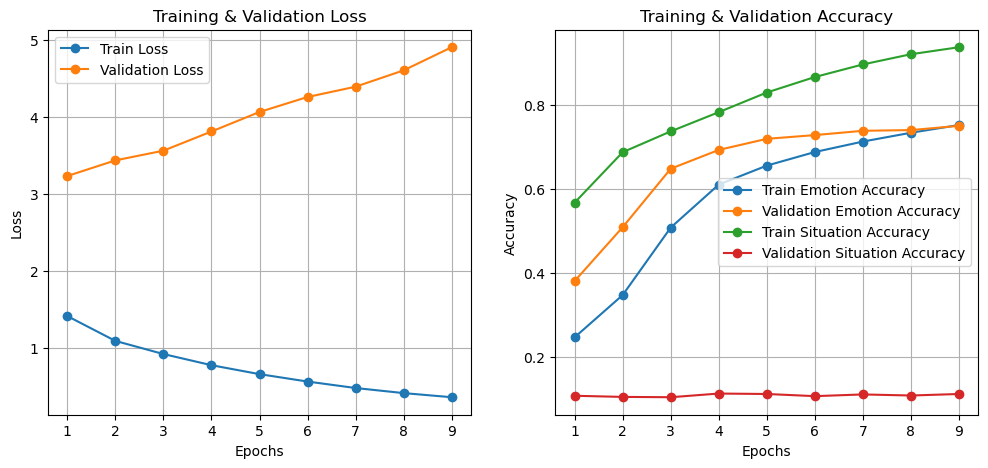

In [118]:
import matplotlib.pyplot as plt

# ✅ history 로드
history = torch.load(f"checkpoints/{TASK_CODE}-final_history.pth")

epochs = range(1, len(history["train_loss"]) + 1)

plt.figure(figsize=(12, 5))

# 🔹 Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, history["train_loss"], label="Train Loss", marker="o")
plt.plot(epochs, history["val_loss"], label="Validation Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)

# 🔹 Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, history["train_acc_emotion"], label="Train Emotion Accuracy", marker="o")
plt.plot(epochs, history["val_acc_emotion"], label="Validation Emotion Accuracy", marker="o")
plt.plot(epochs, history["train_acc_situation"], label="Train Situation Accuracy", marker="o")
plt.plot(epochs, history["val_acc_situation"], label="Validation Situation Accuracy", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid(True)

plt.show()


In [116]:
from sklearn.metrics import accuracy_score, f1_score
import torch

# ✅ 베스트 모델 로드
best_model_path = f"checkpoints/{TASK_CODE}-best_model2430.pth"
model.load_state_dict(torch.load(best_model_path, map_location=device))
model.eval()

# ✅ 테스트 데이터 평가
all_labels_emotion, all_preds_emotion = [], []
all_labels_situation, all_preds_situation = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)

        labels_emotion = batch["emotion"].to(device)
        labels_situation = batch["situation"].to(device)

        # 모델 예측 (감정 & 상황)
        logits_emotion, logits_situation = model(input_ids, attention_mask, token_type_ids)

        # 가장 높은 확률의 클래스로 변환
        preds_emotion = torch.argmax(logits_emotion, dim=1)
        preds_situation = torch.argmax(logits_situation, dim=1)

        # CPU로 변환 후 리스트에 저장
        all_labels_emotion.extend(labels_emotion.cpu().numpy())
        all_preds_emotion.extend(preds_emotion.cpu().numpy())

        all_labels_situation.extend(labels_situation.cpu().numpy())
        all_preds_situation.extend(preds_situation.cpu().numpy())

# ✅ 감정(Emotion) 평가
accuracy_emotion = accuracy_score(all_labels_emotion, all_preds_emotion)
f1_emotion = f1_score(all_labels_emotion, all_preds_emotion, average="macro")

# ✅ 상황(Situation) 평가
accuracy_situation = accuracy_score(all_labels_situation, all_preds_situation)
f1_situation = f1_score(all_labels_situation, all_preds_situation, average="macro")

# ✅ 결과 출력
print(f"✅ Test Accuracy (Emotion): {accuracy_emotion:.4f}")
print(f"✅ Test Accuracy (Situation): {accuracy_situation:.4f}")

print(f"✅ Test F1-Score (Emotion): {f1_emotion:.4f}")
print(f"✅ Test F1-Score (Situation): {f1_situation:.4f}")


FileNotFoundError: [Errno 2] No such file or directory: 'checkpoints/250318-AI-001-best_model2430.pth'